## Improvement vs Horizon for Delay k=1, k=10

This notebook imports the obtained results for varying horizon lengths, AGV group sizes and random start/goal/delay configurations.

In [1]:
import logging
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import numpy as np
import random
import seaborn as sns
import pandas as pd
import statistics as stat
import os
import yaml
import glob

# WHERE TO SAVE THE FIGURES?
# save_loc_iros = "/home/alberndt/Documents/reseach/bosch/figures"
save_loc_icaps = "/home/alberndt/Documents/research/bosch/figures/"

### 1 Load Data: ICAPS_selective

In [2]:
data = {"AGVs": [], "randseed": [], "delay": [], "horizon": [], "total_time": [], "improvement": []}

yaml_list = glob.glob("ICAPS/*.yaml")
horizon_0_data = {"AGVs": [], "randseed": [], "delay": [], "total_time": []}

for file in yaml_list:
    split_filename = file.split("_")
    horizon = str(split_filename[-1].split(".")[0])
    delay = str(split_filename[-3])
    seed = str(split_filename[-5])
    AGVs = str(split_filename[-7])
    with open(file, "r") as stream:
        try:
            yaml_data = yaml.safe_load(stream)
            cumulative_time = yaml_data["results"]["total time"]
            data["AGVs"].append(int(AGVs))
            data["randseed"].append(int(seed))
            data["delay"].append(int(delay))
            data["horizon"].append(int(horizon))
            data["total_time"].append(int(cumulative_time))
            data["improvement"].append(int(cumulative_time))

        except yaml.YAMLError as exc:
            print(exc)

### 2 Calculate Improvement Metric

In [3]:
df = pd.DataFrame(data, columns=["AGVs", "randseed", "delay", "horizon", "total_time", "improvement"])
# Get the 0 horizon data
df_0 = df[df.horizon == 0]

newdata = {"AGVs": [], "randseed": [], "delay": [], "horizon": [], "total_time": [], "improvement": []}

no_baseline_cnt = 0

for index, row in df.iterrows():
    AGVs = row["AGVs"]
    randseed = row["randseed"]
    delay = row["delay"]
    horizon = row["horizon"]
    total_time = row["total_time"]
    
    try: 
        baseline = df_0[(df_0.AGVs == AGVs) & (df_0.randseed == randseed) & (df_0.delay == delay)].iloc[0]
        baseline_time = baseline["total_time"]
        improvement = 100*(baseline_time-total_time)/baseline_time
        newdata["AGVs"].append(int(AGVs))
        newdata["randseed"].append(int(seed))
        newdata["delay"].append(int(delay))
        newdata["horizon"].append(int(horizon))
        newdata["total_time"].append(int(cumulative_time))
        newdata["improvement"].append(float(improvement))
    except IndexError:
        # if no baseline (Horizon = 0) is found, do not add this data: cannot be compared
        no_baseline_cnt += 1
        
print("No baseline count: {}".format(no_baseline_cnt))

dfnew = pd.DataFrame(newdata, columns=["AGVs", "randseed", "delay", "horizon", "total_time", "improvement"])
print(dfnew)

No baseline count: 562
      AGVs  randseed  delay  horizon  total_time  improvement
0       50        25     50        5        4013    12.548671
1       70        25      3        2        4013     1.598295
2       30        25     20        0        4013     0.000000
3       40        25     30        3        4013    10.546697
4       30        25     40       15        4013    40.199416
...    ...       ...    ...      ...         ...          ...
5710    30        25     50        0        4013     0.000000
5711    50        25     40        1        4013    21.997004
5712    30        25     30       11        4013     6.757991
5713    30        25     10        0        4013     0.000000
5714    50        25     10        0        4013     0.000000

[5715 rows x 6 columns]


### 3 Horizon to Improvement

#### Delay k=1

Delay k = 1
 sim count for 30 AGVs: 123
 sim count for 40 AGVs: 112
 sim count for 50 AGVs: 101
 sim count for 60 AGVs: 83
 sim count for 70 AGVs: 60


ValueError: The palette list has the wrong number of colors.

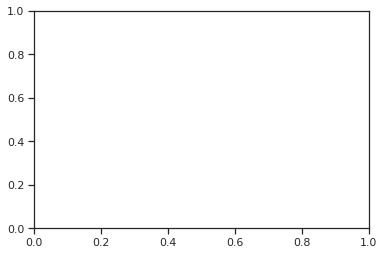

In [4]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=4)

# Delay amount
k = 1 
df_improv = dfnew[dfnew.delay == k]
df_improv_30 = df_improv[df_improv.AGVs == 30]
df_improv_40 = df_improv[df_improv.AGVs == 40]
df_improv_50 = df_improv[df_improv.AGVs == 50]
df_improv_60 = df_improv[df_improv.AGVs == 60]
df_improv_70 = df_improv[df_improv.AGVs == 70]
print("Delay k = {}".format(k))
print(" sim count for 30 AGVs: {}".format(len(df_improv_30.index)))
print(" sim count for 40 AGVs: {}".format(len(df_improv_40.index)))
print(" sim count for 50 AGVs: {}".format(len(df_improv_50.index)))
print(" sim count for 60 AGVs: {}".format(len(df_improv_60.index)))
print(" sim count for 70 AGVs: {}".format(len(df_improv_70.index)))

plt.figure(1)
ax = plt.gca()
# ax.set(yscale="log")
sns.lineplot(x="horizon", y="improvement",
            hue="AGVs",
            data=df_improv,
            palette=sns_col)

plt.xlabel("Horizon H")
plt.ylabel("Improvement [%]")
plt.grid()

ax = plt.gca()
ax.figure.set_size_inches(7,4)
plt.subplots_adjust(left=0.09, bottom=0.13, right=0.98, top=0.98, wspace=None, hspace=None)

plt.savefig(save_loc_icaps + "improvement_vs_horizon_k_1.pdf", format="pdf", pad_inches=0.01, transparent=True)

#### Delay k=10

In [ ]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=4)

# Delay amount
k = 10 
df_improv = dfnew[dfnew.delay == k]
df_improv_30 = df_improv[df_improv.AGVs == 30]
df_improv_40 = df_improv[df_improv.AGVs == 40]
df_improv_50 = df_improv[df_improv.AGVs == 50]
df_improv_60 = df_improv[df_improv.AGVs == 60]
df_improv_70 = df_improv[df_improv.AGVs == 70]
print("Delay k = {}".format(k))
print(" sim count for 30 AGVs: {}".format(len(df_improv_30.index)))
print(" sim count for 40 AGVs: {}".format(len(df_improv_40.index)))
print(" sim count for 50 AGVs: {}".format(len(df_improv_50.index)))
print(" sim count for 60 AGVs: {}".format(len(df_improv_60.index)))
print(" sim count for 70 AGVs: {}".format(len(df_improv_70.index)))

plt.figure(2)
ax = plt.gca()
# ax.set(yscale="log")
sns.lineplot(x="horizon", y="improvement",
            hue="AGVs",
            data=df_improv,
            palette=sns_col)

plt.xlabel("Horizon H")
plt.ylabel("Improvement [%]")
plt.grid()

ax = plt.gca()
ax.figure.set_size_inches(7,4)
plt.subplots_adjust(left=0.09, bottom=0.13, right=0.98, top=0.98, wspace=None, hspace=None)

# plt.savefig(save_loc_iros + "improvement_vs_horizon_k_10.pdf", format="pdf", pad_inches=0.01, transparent=True)
plt.savefig(save_loc_icaps + "improvement_vs_horizon_k_10.pdf", format="pdf", pad_inches=0.01, transparent=True)